In [2]:
import numpy as np
import matplotlib.pyplot as plt

Q1. 给定如下一元高斯函数，参数 a = 1, b = 2, c = 1。请用 NumPy 和 Matplotlib 线图可视 化函数函数图像。
$$
f(x) = a exp(-\frac{(x - b)^2}{2c^2})
$$

In [4]:
a = 1
b = 2
c = 1
x_array = np.linspace(-6, 6, 121)
f_x_array = a * np.exp(-(x_array - b)**2/2/c**2)

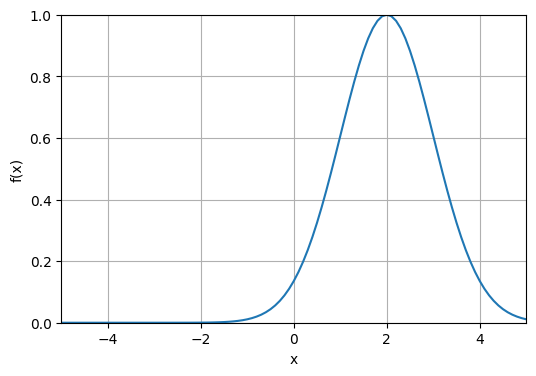

In [6]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(x_array, f_x_array)

ax.set_xlim(-5, 5)
ax.set_ylim(0, f_x_array.max())    
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
plt.grid()

Q2. 给定如下二元高斯函数。请用 NumPy 和 Matplotlib 三维网格面可视化二元函数图像。
$$
f(x_1, x_2) = exp(-x_1^2 - x_2^2)
$$

In [7]:
x1_array = np.linspace(-3, 3, 121)
x2_array = np.linspace(-3, 3, 121)
xx1, xx2 = np.meshgrid(x1_array, x2_array)
ff = np.exp(-xx1**2 - xx2**2)

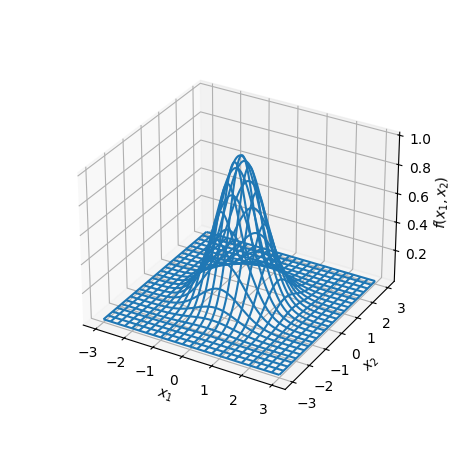

In [13]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.plot_wireframe(xx1, xx2, ff, rstride=5, cstride=5)
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
ax.set_zlabel(r'$f(x_1, x_2)$')
plt.tight_layout()
ax.set_box_aspect(aspect=None, zoom=0.8)

下式为二元高斯分布的概率密度函数，请用 NumPy 和 Matplotlib 填充等高线可视化这个二元 函数图像。参数具体为$μ_X =0,μ_Y =0,σ_X =1,σ_Y =1,ρ_{X,Y} =0.6$。
$$
f(x,y) = \frac{1}{2\pi \sigma_X\sigma_Y\sqrt{1 - \rho^2}}exp \left( -\frac{1}{2(1-\rho^2)} \left[ \left( \frac{x - \mu_X}{\sigma_X}\right )^2 - 2\rho\left( \frac{x - \mu_X}{\sigma_X}\right)\left(\frac{y - \mu_Y}{\sigma_Y} \right) + \left( \frac{y - \mu_Y}{\sigma_Y}\right)^2 \right]\right)
$$

In [15]:
sigma_X = 1
sigma_Y = 1
rho_XY = 0.6
mu_X = 0
mu_Y = 0

In [16]:
def f_XY_PDF(xx1, xx2, sigma_X, sigma_Y, rho_XY, mu_X, mu_Y):
    coeff = 2 * np.pi * sigma_X * sigma_Y * np.sqrt(1 - rho_XY**2)
    coeff = 1 / coeff
    xx1_ = (xx1 - mu_X) / sigma_X
    xx2_ = (xx2 - mu_Y) / sigma_Y
    
    ellipse = 1 / (1 - rho_XY**2) * (xx1**2 - 2 * rho_XY * xx1_ * xx2_ + xx2_**2)
    PDF = coeff * np.exp(-1/2 * ellipse)
    
    return PDF

In [17]:
PDF_ff = f_XY_PDF(xx1, xx2, sigma_X, sigma_Y, rho_XY, mu_X, mu_Y)

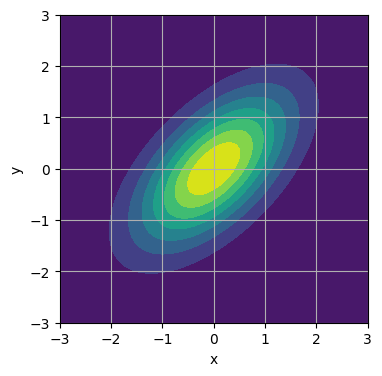

In [20]:
fig, ax = plt.subplots(figsize=(4, 4))

ax.contourf(xx1, xx2, PDF_ff)

ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)    
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.grid()
ax.set_aspect('equal', adjustable='box')